In [1]:
#Import scipy
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri

#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

In [3]:
#Define mass

m1=1 #Alpha Centauri A
m2=0.5 #Alpha Centauri B
#Define initial position vectors
r1=[0,0] #m
r2=[1.00269,0] #m
#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")
#Find Centre of Mass
r_com=(m1*r1+m2*r2)/(m1+m2)
#Define initial velocities
v1=[0.01,0.01] #m/s
v2=[-0.0,-0.1] #m/s
#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")
#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

In [4]:
#A function defining the equations of motion 
def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:2]
    r2=w[2:4]
    v1=w[4:6]
    v2=w[6:8]
    r=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    dv1bydt=K1*m2*(r2-r1)/r**3
    dv2bydt=K1*m1*(r1-r2)/r**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    r_derivs=sci.concatenate((dr1bydt,dr2bydt))
    derivs=sci.concatenate((r_derivs,dv1bydt,dv2bydt))
    return derivs

In [5]:
#Package initial parameters
init_params=sci.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=sci.linspace(0,8,500) #8 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
two_body_sol=sci.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))

In [6]:
r1_sol=two_body_sol[:,:2]
r2_sol=two_body_sol[:,2:4]

In [10]:
r1_sol


array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.25345158e-03,  1.16021457e-03],
       [ 2.69292173e-03,  2.31806721e-03],
       [ 4.31902070e-03,  3.47114216e-03],
       [ 6.13247359e-03,  4.61702081e-03],
       [ 8.13413207e-03,  5.75323674e-03],
       [ 1.03249723e-02,  6.87727847e-03],
       [ 1.27061047e-02,  7.98657689e-03],
       [ 1.52787690e-02,  9.07849890e-03],
       [ 1.80443413e-02,  1.01503385e-02],
       [ 2.10043406e-02,  1.11993057e-02],
       [ 2.41604344e-02,  1.22225140e-02],
       [ 2.75144436e-02,  1.32169703e-02],
       [ 3.10683481e-02,  1.41795638e-02],
       [ 3.48242957e-02,  1.51070499e-02],
       [ 3.87846123e-02,  1.59960298e-02],
       [ 4.29518085e-02,  1.68429392e-02],
       [ 4.73285885e-02,  1.76440320e-02],
       [ 5.19178636e-02,  1.83953529e-02],
       [ 5.67227632e-02,  1.90927185e-02],
       [ 6.17466490e-02,  1.97316875e-02],
       [ 6.69931296e-02,  2.03075345e-02],
       [ 7.24660770e-02,  2.08152129e-02],
       [ 7.

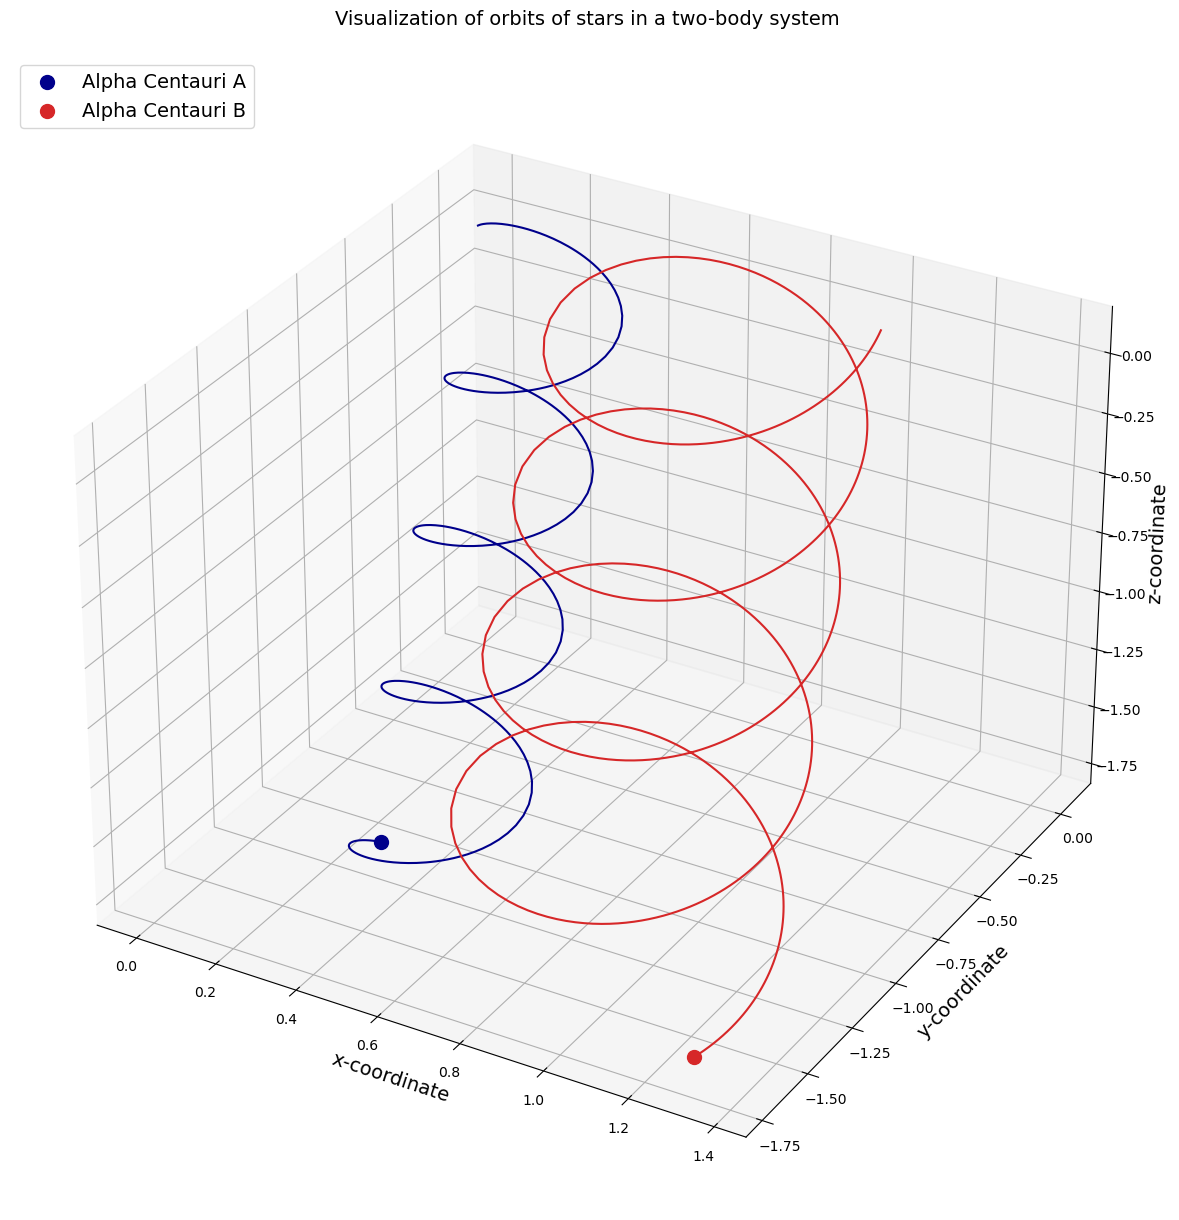

In [7]:
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,1],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,1],color="tab:red")

#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,1],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,1],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

In [8]:
#Find location of COM
rcom_sol=(m1*r1_sol+m2*r2_sol)/(m1+m2)
#Find location of Alpha Centauri A w.r.t COM
r1_com=r1_sol-rcom_sol
#Find location of Alpha Centauri B w.r.t COM
r2_com=r2_sol-rcom_sol

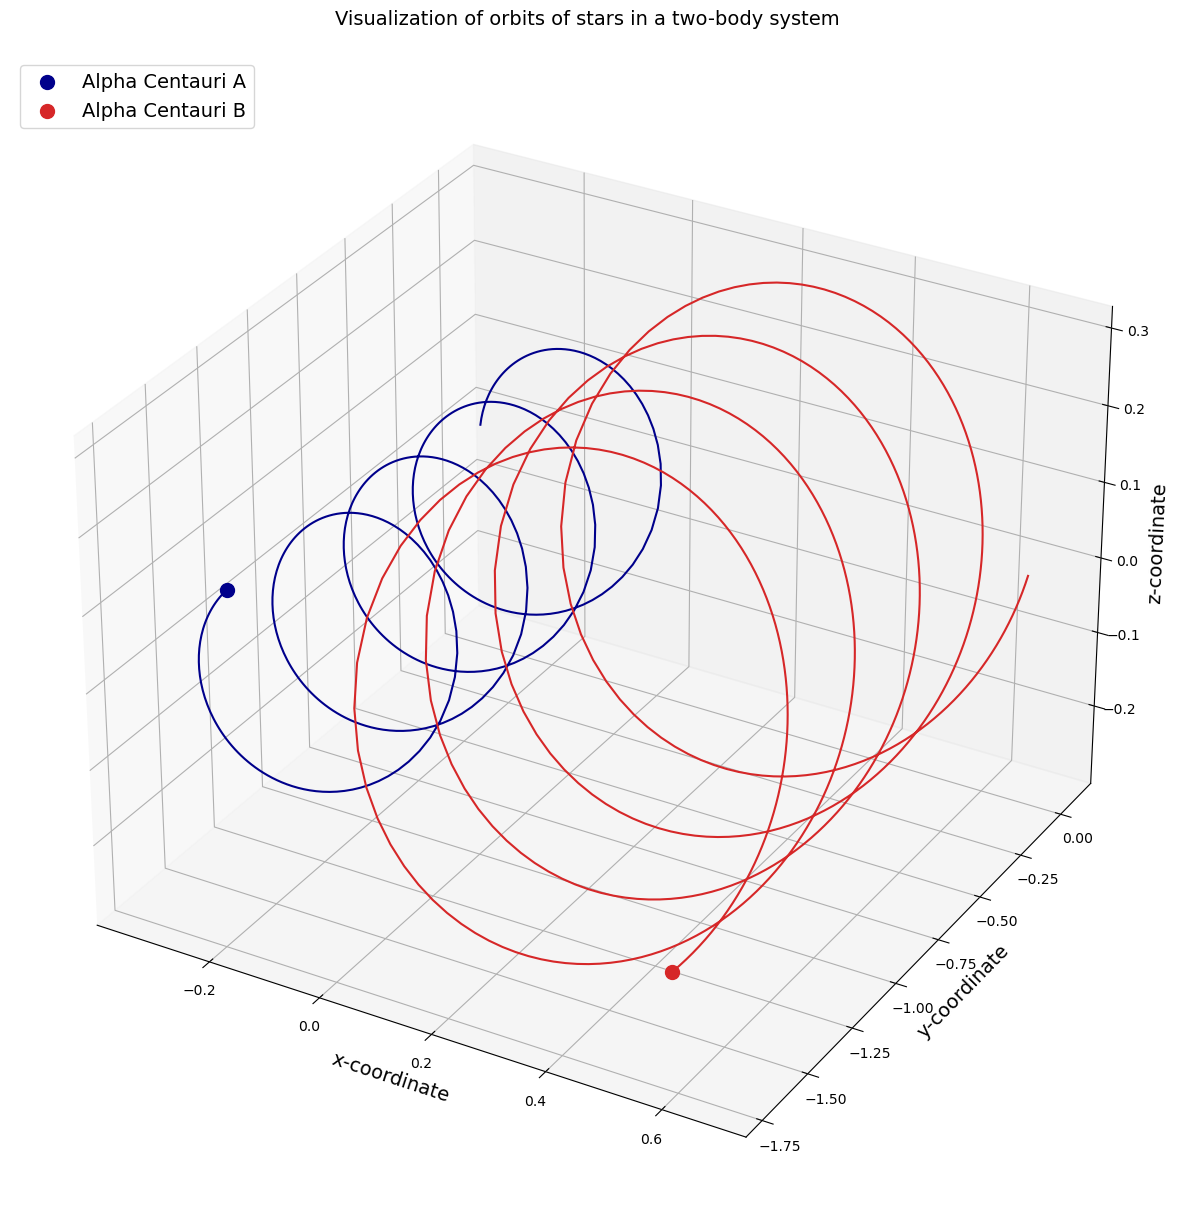

In [9]:
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_com[:,0],r1_sol[:,1],r1_com[:,1],color="darkblue")
ax.plot(r2_com[:,0],r2_sol[:,1],r2_com[:,1],color="tab:red")

#Plot the final positions of the stars
ax.scatter(r1_com[-1,0],r1_sol[-1,1],r1_com[-1,1],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_com[-1,0],r2_sol[-1,1],r2_com[-1,1],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)
